Diwali Sales Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [6]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
df['Amount'].describe()

count    11239.000000
mean      9453.610858
std       5222.355869
min        188.000000
25%       5443.000000
50%       8109.000000
75%      12675.000000
max      23952.000000
Name: Amount, dtype: float64

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df.Amount = imputer.fit_transform(df['Amount'].values.reshape(-1,1))

In [9]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
df['Amount'] = df['Amount'].astype('int')

In [11]:
df['Amount'].dtypes

dtype('int32')

In [12]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9452.176429
std,1.716125e+03,12.754122,0.493632,1.115047,5219.753707
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

Exploratory Data Analysis(EDA)

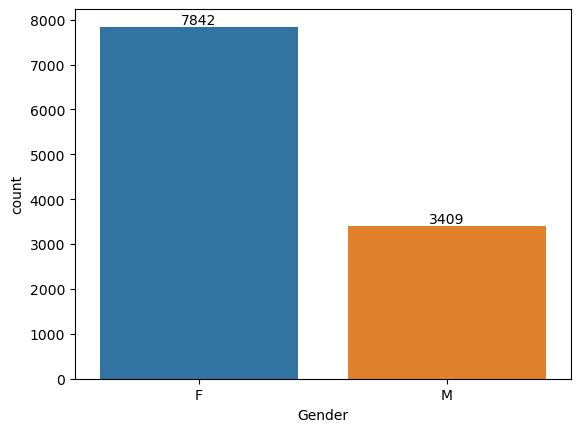

In [14]:
ax = sns.countplot(x = 'Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

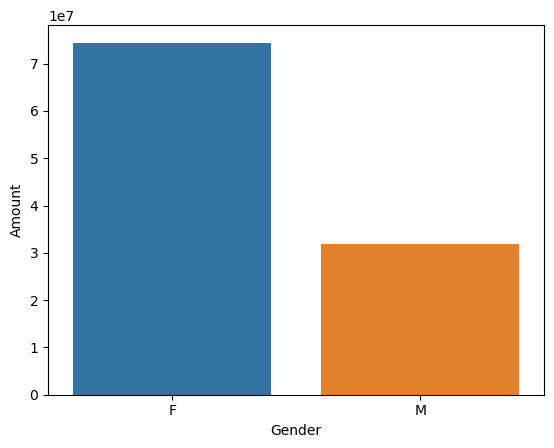

In [15]:
Sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax = sns.barplot(x= 'Gender', y = 'Amount', data = Sales_gen)

Age

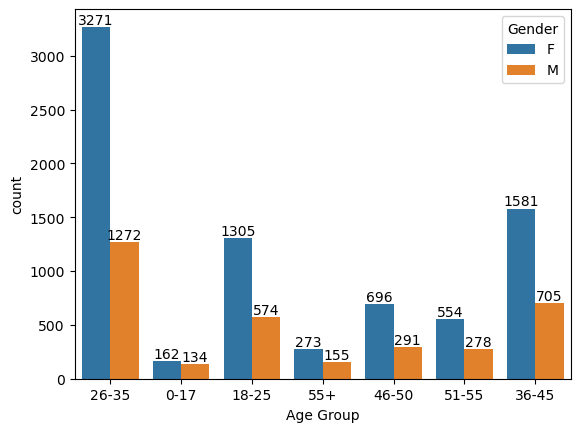

In [16]:
ax = sns.countplot(x = 'Age Group', data = df, hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

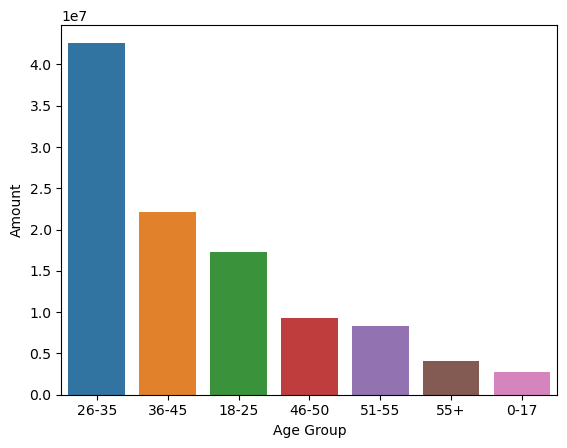

In [17]:
Sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
ax = sns.barplot(x='Age Group', y='Amount', data=Sales_age)

State

<Axes: xlabel='State', ylabel='Orders'>

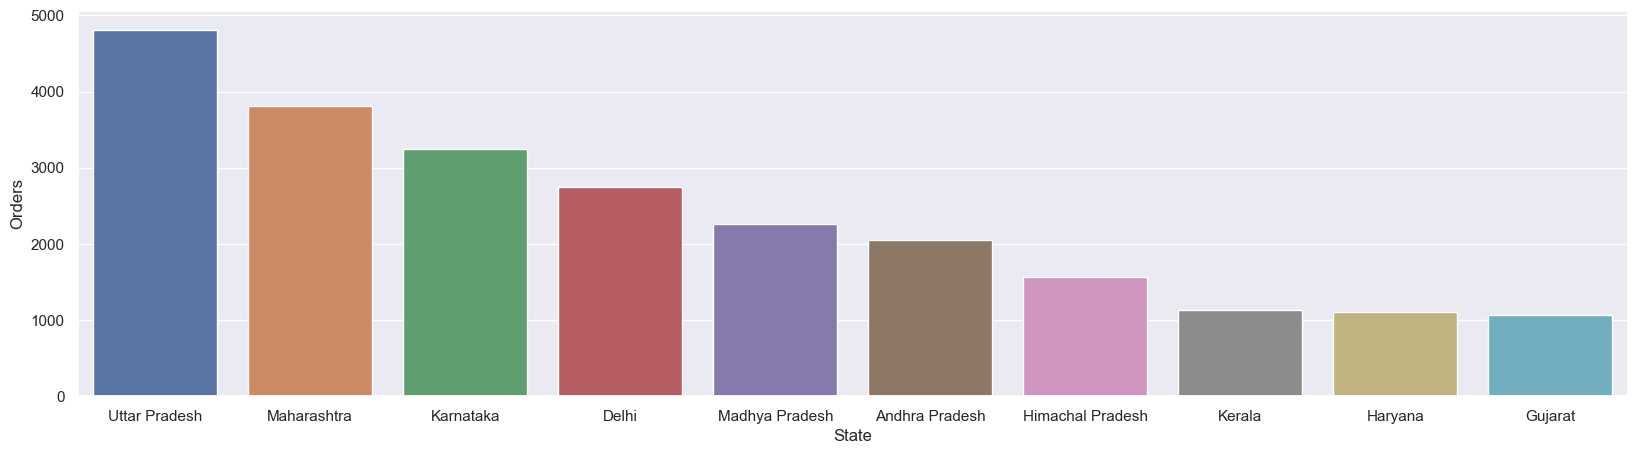

In [18]:
Sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by = 'Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot( x = 'State', y = 'Orders', data = Sales_state)

<Axes: xlabel='State', ylabel='Amount'>

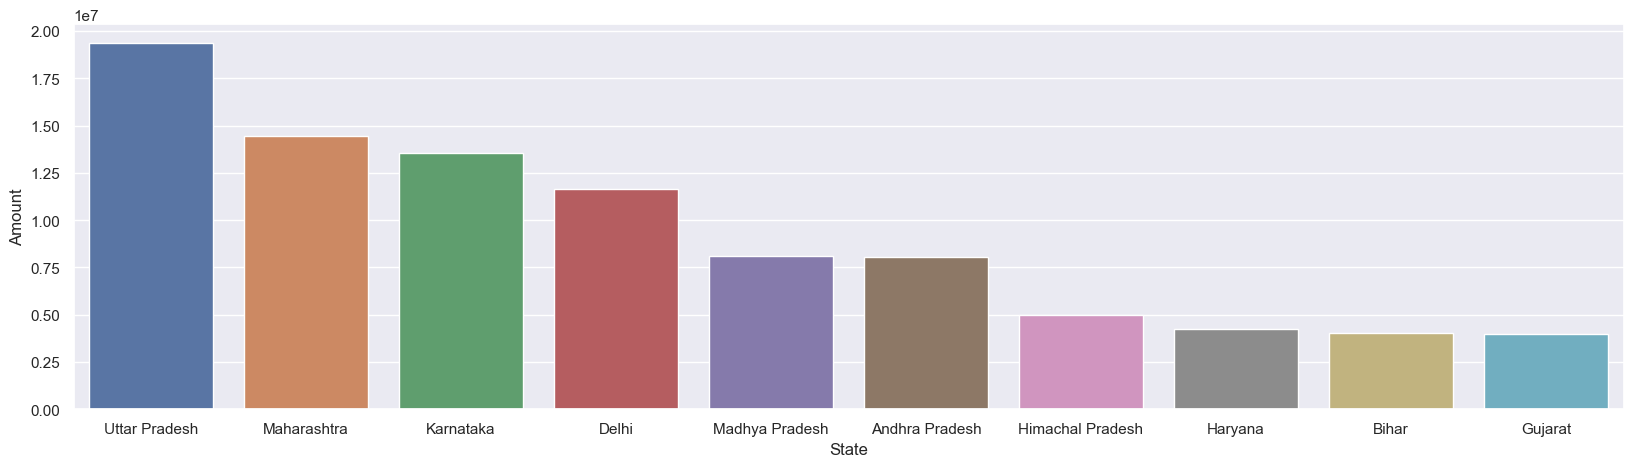

In [19]:
Sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot( x = 'State', y = 'Amount', data = Sales_state)

Marital status

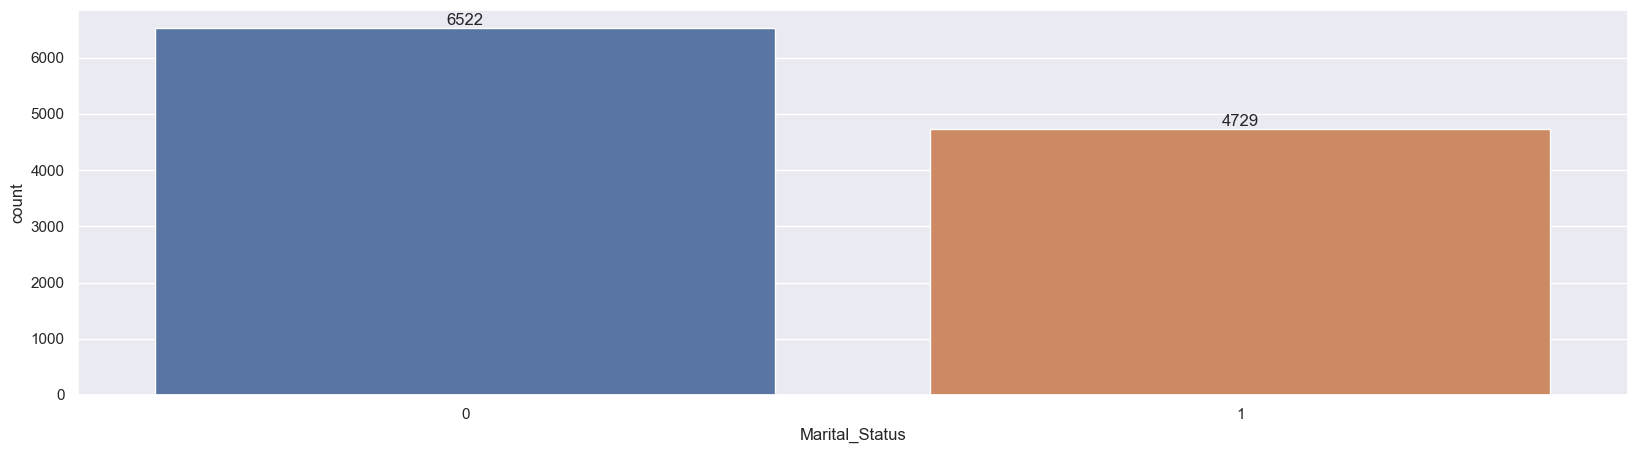

In [20]:
ax = sns.countplot( x = 'Marital_Status', data = df)
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

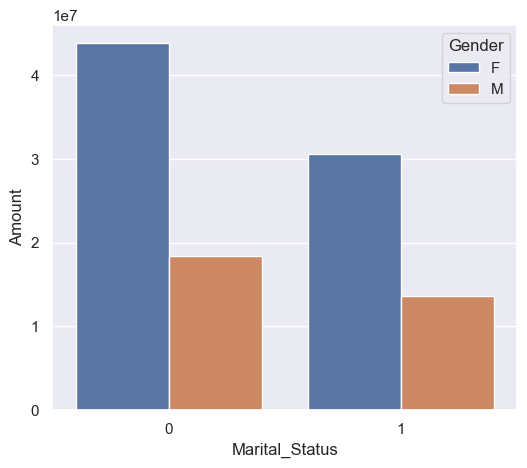

In [21]:
Sales_ms = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot( data = Sales_ms, x = 'Marital_Status', y = 'Amount',  hue='Gender')

Occupation

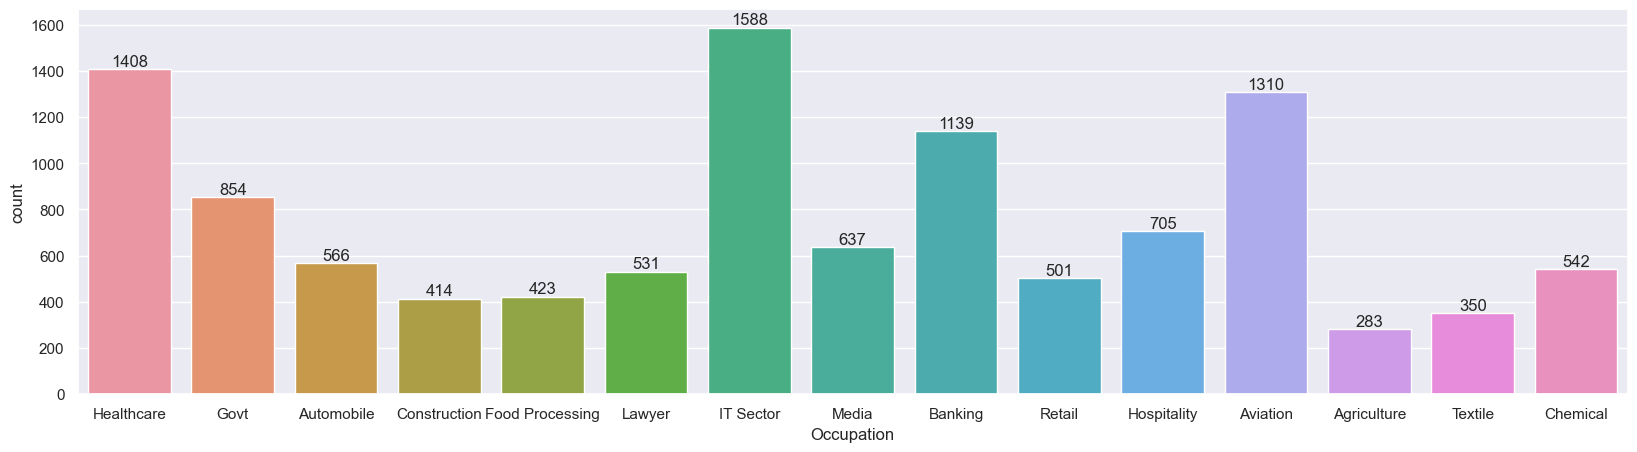

In [22]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot( x = 'Occupation', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

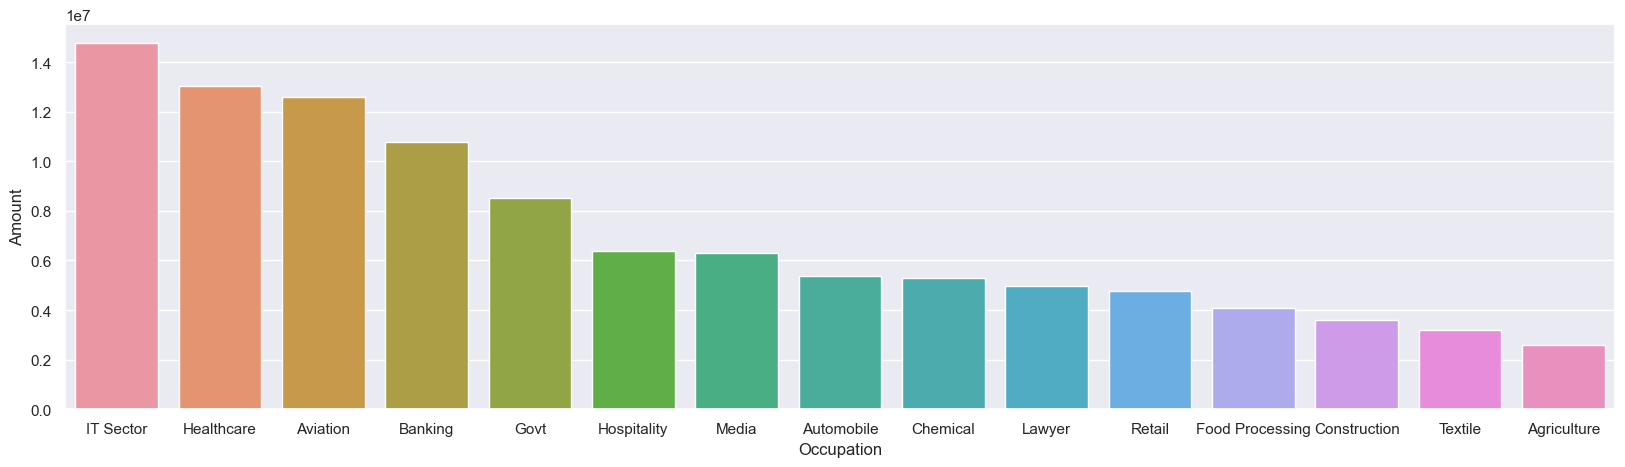

In [23]:
Sales_occ = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot( x  = 'Occupation', y = 'Amount', data = Sales_occ)

Product Category

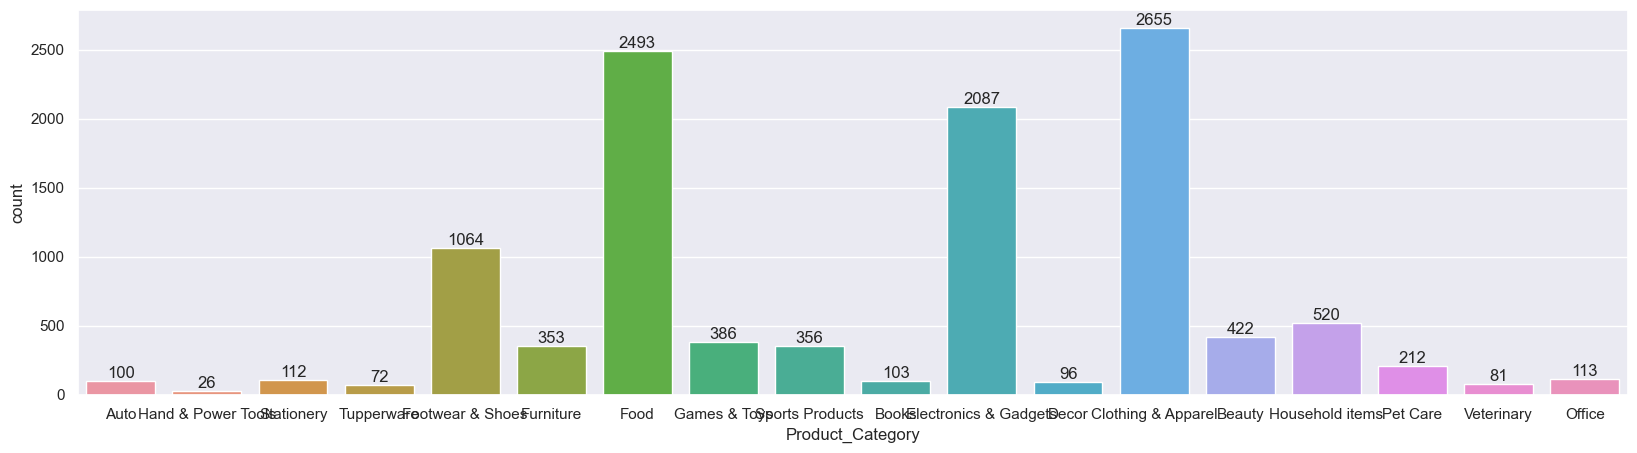

In [24]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot( x = 'Product_Category', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

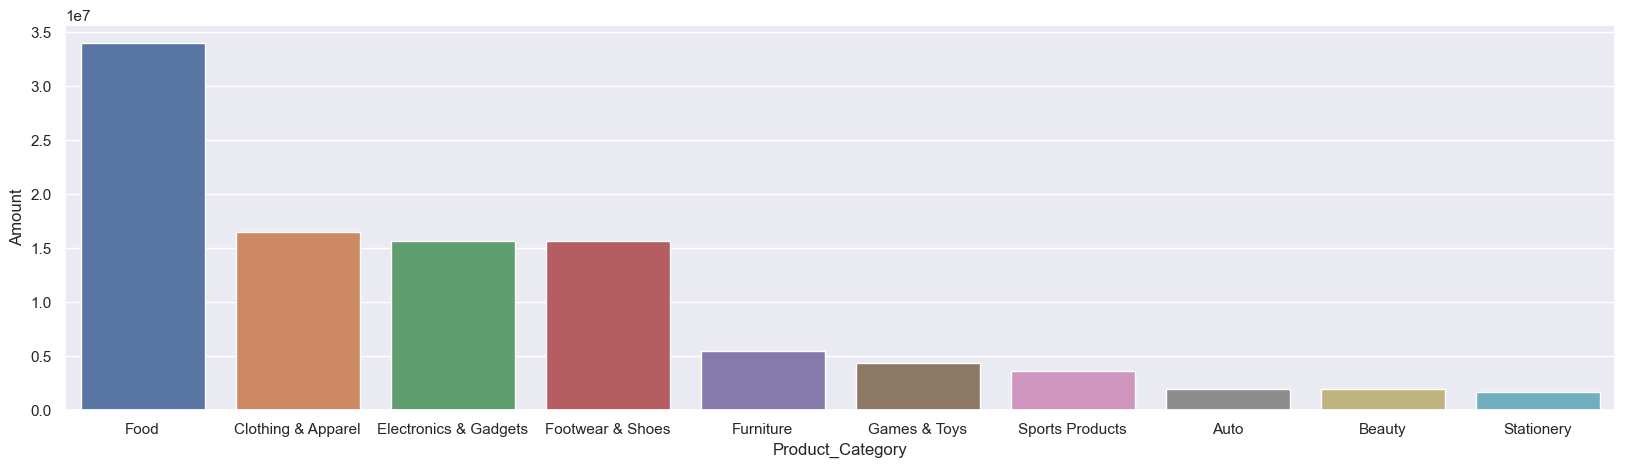

In [25]:
Sales_pc = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot( x = 'Product_Category', y = 'Amount', data = Sales_pc)

<Axes: xlabel='Product_ID', ylabel='Orders'>

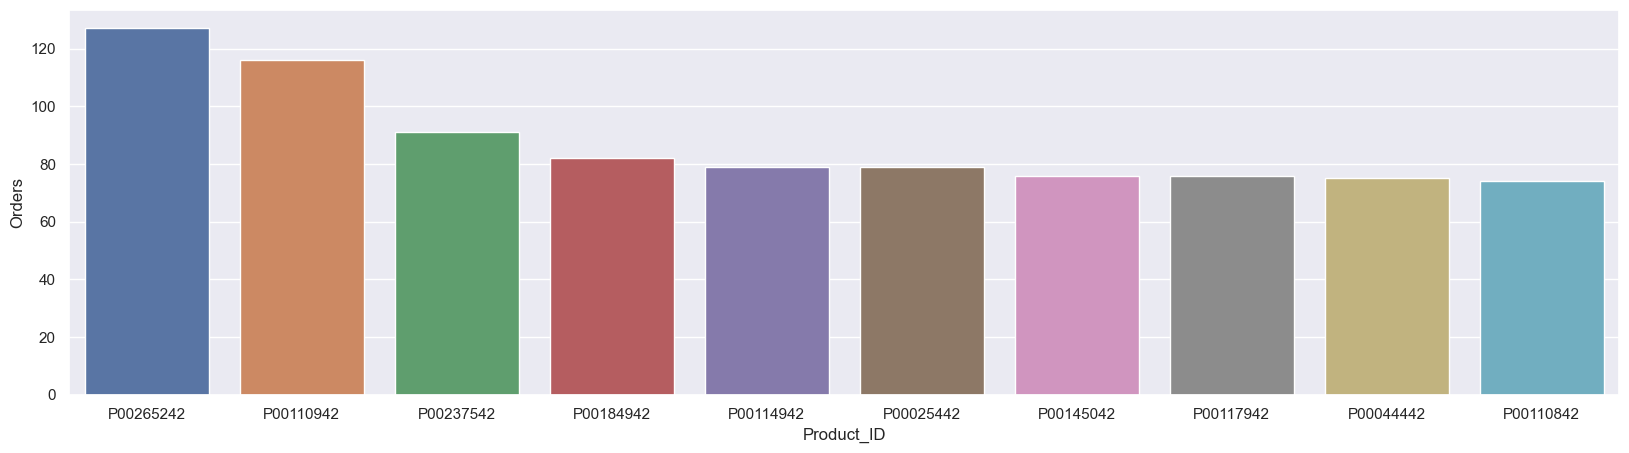

In [26]:
Sales_tp = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by = 'Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot( x = 'Product_ID', y = 'Orders', data = Sales_tp)

Conclusion

In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [28]:
df = pd.DataFrame(df, columns = ['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount']).to_csv('1.csv')